## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an
unsupervised learning algorithm that groups data points based on **density**
rather than distance to cluster centers.

Unlike centroid-based algorithms such as K-Means, DBSCAN does not require the
number of clusters to be specified in advance and is capable of discovering
clusters with **arbitrary shapes**, while explicitly identifying **noise points**.


### Core Idea

The fundamental idea of DBSCAN is that clusters are defined as regions of high
point density separated by regions of low density.

A cluster is formed by connecting points that are sufficiently close to each
other and have enough neighboring points within a specified radius.

### Key Parameters

DBSCAN relies on two key hyperparameters:

- **ε (eps)**:  
  The maximum distance between two points for them to be considered neighbors.

- **min_samples**:  
  The minimum number of points required within an ε-neighborhood for a point
  to be classified as a *core point*.


### Point Types in DBSCAN

Based on the values of `eps` and `min_samples`, DBSCAN classifies points into
three categories:

- **Core Point**:  
  A point that has at least `min_samples` points (including itself) within its
  ε-neighborhood.

- **Border Point**:  
  A point that is within the ε-neighborhood of a core point but does not itself
  have enough neighbors to be a core point.

- **Noise Point**:  
  A point that is neither a core point nor a border point.


### Cluster Expansion

Clusters in DBSCAN are constructed through an iterative expansion process:

1. Select an unvisited core point and assign it to a new cluster.
2. Add all points within its ε-neighborhood to the cluster.
3. If any of these neighboring points are also core points, recursively expand
   the cluster by adding their neighbors.
4. Continue until no more points can be added to the cluster.


### Limitations

Despite its strengths, DBSCAN also has limitations:

- Sensitive to the choice of `eps` and `min_samples`
- Difficulty handling datasets with varying densities
- Performance may degrade for high-dimensional data


## Data Loading and Preprocessing

In this example, we use a real-world customer segmentation dataset obtained from
Kaggle. The dataset contains demographic and behavioral information of mall
customers.

To demonstrate the DBSCAN algorithm, we focus on two continuous features:

- **Annual Income (k$)**
- **Spending Score (1–100)**

These features form a two-dimensional space suitable for density-based
clustering and visualization.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
df = pd.read_csv("D:/研究生/机器学习/INDE-577/ml_project/examples/data/Mall_Customers.csv")
df.head()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Feature Selection

Only numerical features related to customer purchasing behavior are selected
for clustering. Identifiers and categorical variables are excluded, as they do
not represent meaningful distance relationships.


In [5]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
X.shape

(200, 2)

### Feature Scaling

Since DBSCAN relies on distance-based neighborhood queries, feature scaling is
essential. We apply standardization to ensure each feature has zero mean and
unit variance.


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(200, 2)

### Visualization of Standardized Feature Space

The scatter plot below illustrates the standardized feature space used for
DBSCAN clustering. Each point represents a customer.


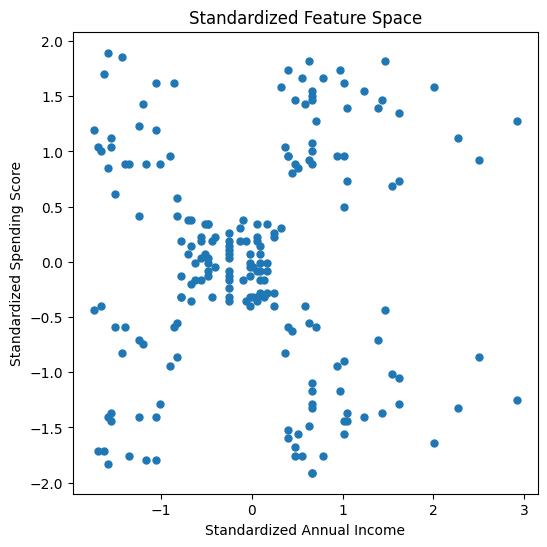

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=25)
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.title("Standardized Feature Space")
plt.show()

## DBSCAN Clustering

In this section, we apply the DBSCAN algorithm implemented in the
`rice_ml` package to the standardized customer dataset.

DBSCAN groups points based on local density and explicitly identifies
noise points that do not belong to any dense region.

### Model Initialization

The DBSCAN algorithm requires two key parameters:

- **eps**: radius of the neighborhood
- **min_samples**: minimum number of points required to form a dense region

These parameters control the density threshold for cluster formation.


In [8]:
from rice_ml.dbscan import DBSCAN

# Initialize DBSCAN model
dbscan = DBSCAN(
    eps=0.35,
    min_samples=5
)

# Fit model and obtain cluster labels
labels = dbscan.fit_predict(X_scaled)

labels[:20]


array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1])

### Clustering Statistics

After clustering, we examine the number of discovered clusters and
the number of noise points.


In [9]:
# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Number of noise points
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters: 6
Number of noise points: 23


### Visualization of DBSCAN Results

The scatter plot below shows the clustering result produced by DBSCAN.
Different colors represent different clusters, while noise points
are highlighted separately.


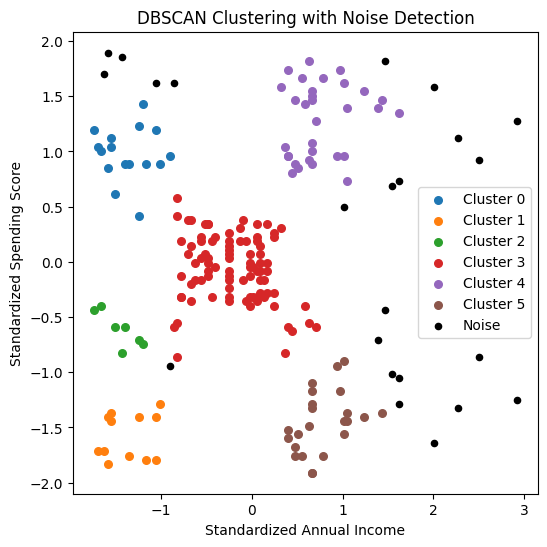

In [10]:
plt.figure(figsize=(6, 6))

unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(
            X_scaled[labels == label, 0],
            X_scaled[labels == label, 1],
            c="black",
            s=20,
            label="Noise"
        )
    else:
        plt.scatter(
            X_scaled[labels == label, 0],
            X_scaled[labels == label, 1],
            s=30,
            label=f"Cluster {label}"
        )

plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.title("DBSCAN Clustering with Noise Detection")
plt.legend()
plt.show()


### Interpretation of DBSCAN Results

The DBSCAN algorithm identifies multiple clusters of customers based on local
density in the standardized feature space.

Each colored region represents a dense group of customers with similar annual
income and spending behavior. These clusters are not constrained to be spherical
or equal in size, demonstrating DBSCAN’s ability to capture irregular cluster
structures.

Points labeled as **Noise** (black dots) correspond to customers that do not
belong to any dense region. These points are intentionally excluded from clusters
rather than being forcibly assigned, which highlights DBSCAN’s robustness to
outliers.


## Summary & Key Takeaways

In this example, we applied the DBSCAN algorithm to a real-world customer
segmentation dataset from Kaggle.

Key observations from the analysis are summarized as follows:

- DBSCAN successfully identified multiple customer groups based on local data
  density without requiring the number of clusters to be specified in advance.

- The algorithm was able to detect clusters with irregular shapes and varying
  sizes, which is difficult for centroid-based methods such as K-Means.

- Noise points were explicitly identified and excluded from clusters, providing
  a more realistic representation of outliers in real-world data.

- Feature standardization played a crucial role in ensuring meaningful distance
  calculations for density-based clustering.

Overall, DBSCAN proves to be an effective unsupervised learning method for
discovering structure in datasets with complex cluster geometry and the
presence of noise.
